In [54]:
import bz2
import pandas as pd
from matplotlib import pyplot as plt
import pyinform
import numpy as np
from scipy.stats import kurtosis
from matplotlib import pyplot as plt

import sys
sys.path.append('../processing')
from fastreader import fastreader

import sys
sys.path.append('../info_metrics')
from entropy_metrics import *

In [4]:
# inputfilepath = "../data/2019_09_07/pageviews-20190907-user"
# outputfilepath = "../data/UNC/pageviews-20190907-user"

# fastreader(inputfilepath, outputfilepath, maxlines=10*10**6)

ERROR: outputfile is not a valid parquet file!
begin processing on file: ../data/2019_09_07/pageviews-20190907-user
lines read: 1M
lines read: 2M
lines read: 3M
lines read: 4M
lines read: 5M
lines read: 6M
lines read: 7M
lines read: 8M
lines read: 9M
lines read: 10M
convert list to dataframe
write parquet to file: ../data/UNC/pageviews-20190907-user (may take some time due to partitioning)


In [5]:
def column_merger(columns):
    columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in columns]
    return columns

def count_unique(series):
    return len(np.unique(series))

def mean_absolute_deviation(x):
    return np.mean(np.abs(x - np.mean(x)))

In [6]:
print("reading pageviews-20190907-spider")
df_20190907_spider = pd.read_parquet("../data/UNC/pageviews-20190907-spider/")
print("reading pageviews-20190907-user")
df_20190907_user = pd.read_parquet("../data/UNC/pageviews-20190907-user/")

reading pageviews-20190907-spider
reading pageviews-20190907-user


In [8]:
df_20190907_user.head(10)

,domain,title,id,access_type,total,hour,count,traffic_type,year,month,day
0,aa.wikibooks,File:Commons-logo.svg,-1,desktop,1,18,1,user,2019,9,7
1,aa.wikibooks,File:Graduation_cap.png,-1,desktop,2,18,2,user,2019,9,7
2,aa.wikibooks,File:Incubator-logo.svg,-1,desktop,1,18,1,user,2019,9,7
3,aa.wikibooks,File:Wikibooks-logo.svg,-1,desktop,1,18,1,user,2019,9,7
4,aa.wikibooks,File:Wikimania.svg,-1,desktop,1,18,1,user,2019,9,7
5,aa.wikibooks,File:Wikimedia.png,-1,desktop,2,18,2,user,2019,9,7
6,aa.wikibooks,File:Wikimedia_Community_Logo.svg,-1,desktop,1,18,1,user,2019,9,7
7,aa.wikibooks,File:Wikinews-logo.svg,-1,desktop,2,18,2,user,2019,9,7
8,aa.wikibooks,File:Wikipedia-logo-de.png,-1,desktop,2,18,2,user,2019,9,7
9,aa.wikibooks,File:Wikiquote-logo.png,-1,desktop,2,18,2,user,2019,9,7


In [20]:
simple_stats = {
    "total": [np.mean, np.sum]
}

print("df_20190907_spider_ph stats START")
df_20190907_spider_ph = df_20190907_spider
df_20190907_spider_ph = df_20190907_spider_ph.astype(dtype= {"total":"float64", "hour": "int64"})
df_20190907_spider_ph = df_20190907_spider_ph.groupby(by=["hour"]).agg(simple_stats).reset_index()
df_20190907_spider_ph.columns = column_merger(df_20190907_spider_ph.columns)
print("df_20190907_spider_ph stats DONE")

print("df_20190907_user_ph stats START")
df_20190907_user_ph = df_20190907_user
df_20190907_user_ph = df_20190907_user_ph.astype(dtype= {"total":"float64", "hour": "int64"})
df_20190907_user_ph = df_20190907_user_ph.groupby(by=["hour"]).agg(simple_stats).reset_index()
df_20190907_user_ph.columns = column_merger(df_20190907_user_ph.columns)
print("df_20190907_user_ph stats DONE")


df_20190907_spider_ph stats START
df_20190907_spider_ph stats DONE
df_20190907_user_ph stats START
df_20190907_user_ph stats DONE


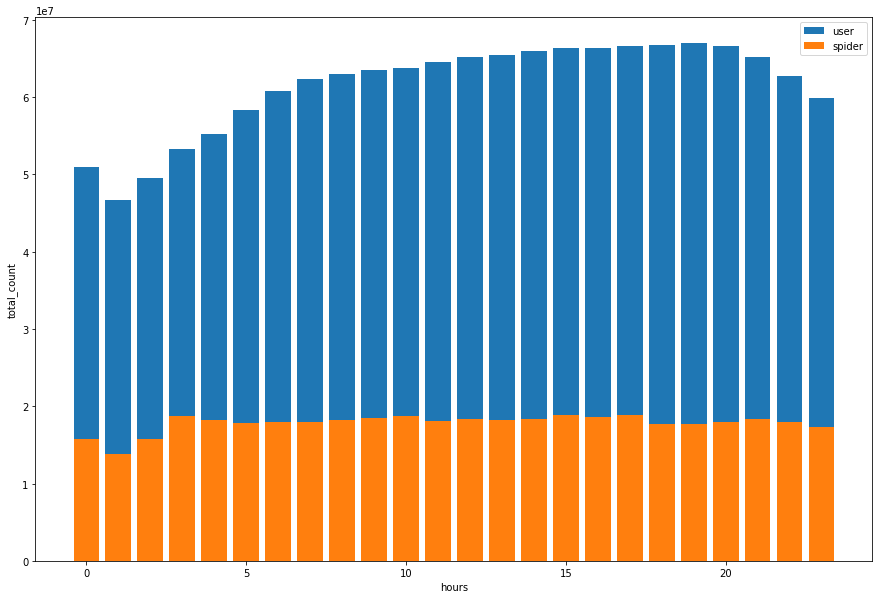

In [52]:
plt.figure(figsize=(15,10))
plt.bar(df_20190907_user_ph["hour"], df_20190907_user_ph["total_sum"] , align='center', label="user")
plt.bar(df_20190907_spider_ph["hour"], df_20190907_spider_ph["total_sum"] , align='center', label="spider")
plt.ylabel("total_count")
plt.xlabel("hours")
plt.legend()
plt.show()

In [22]:
print("df_20190907_spider_ph stats START")
df_20190907_spider_pd = df_20190907_spider
df_20190907_spider_pd = df_20190907_spider_pd.astype(dtype= {"total":"float64", "hour": "int64"})
df_20190907_spider_pd = df_20190907_spider_pd.groupby(by=["domain"]).agg(simple_stats).reset_index()
df_20190907_spider_pd.columns = column_merger(df_20190907_spider_pd.columns)
print("df_20190907_spider_ph stats DONE")

print("df_20190907_user_ph stats START")
df_20190907_user_pd = df_20190907_user
df_20190907_user_pd = df_20190907_user_pd.astype(dtype= {"total":"float64", "hour": "int64"})
df_20190907_user_pd = df_20190907_user_pd.groupby(by=["domain"]).agg(simple_stats).reset_index()
df_20190907_user_pd.columns = column_merger(df_20190907_user_pd.columns)
print("df_20190907_user_ph stats DONE")

df_20190907_spider_ph stats START
df_20190907_spider_ph stats DONE
df_20190907_user_ph stats START
df_20190907_user_ph stats DONE


In [48]:
top_domains=np.array([])
top_domains = np.append(top_domains, df_20190907_user_pd["domain"][df_20190907_user_pd["total_sum"] >= np.mean(df_20190907_user_pd["total_sum"])].unique())
top_domains = np.append(top_domains, df_20190907_spider_pd["domain"][df_20190907_spider_pd["total_sum"] >= np.mean(df_20190907_spider_pd["total_sum"])].unique())

df_20190907_user_pd_cut = df_20190907_user_pd[df_20190907_user_pd["domain"].isin(top_domains)]
df_20190907_spider_pd_cut = df_20190907_spider_pd[df_20190907_spider_pd["domain"].isin(top_domains)]


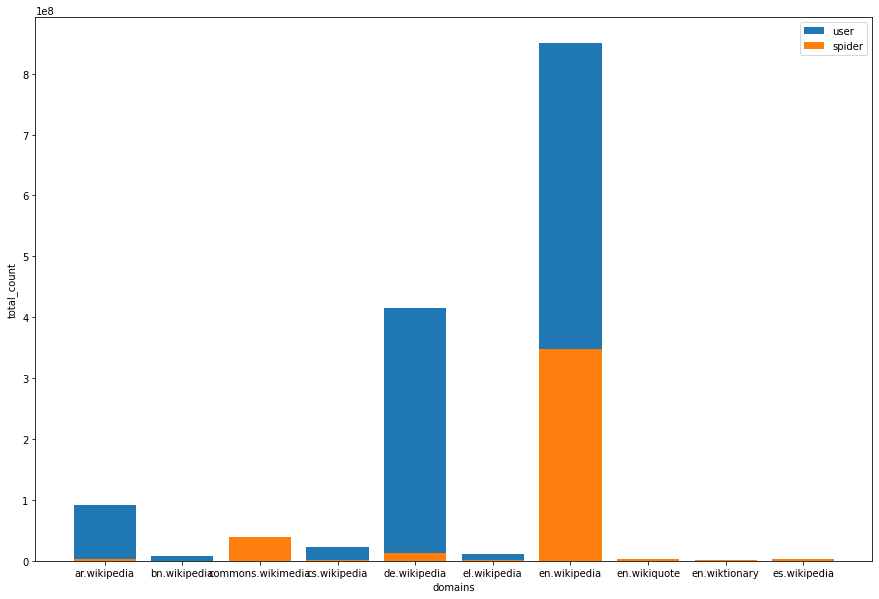

In [53]:
plt.figure(figsize=(15,10))
plt.bar(df_20190907_user_pd_cut["domain"], df_20190907_user_pd_cut["total_sum"] , align='center', label="user")
plt.bar(df_20190907_spider_pd_cut["domain"], df_20190907_spider_pd_cut["total_sum"] , align='center', label="spider")
plt.ylabel("total_count")
plt.xlabel("domains")
plt.legend()
plt.show()

In [78]:
a = df_20190907_spider_ph["total_sum"].to_numpy()
a = a.reshape(-1,1)
# a
mi(df_20190907_spider_ph["total_sum"], df_20190907_spider_ph["total_sum"], k=2)

2.502053762500811

In [71]:
a = df_20190907_spider_ph["total_sum"].to_numpy()
a = a.reshape(-1,1)
print(entropy(a))


b = df_20190907_user_ph["total_sum"].to_numpy()
b = b.reshape(-1,1)
entropy(b)



21.586385263164726


24.09386942612408

In [63]:
df_20190907_spider_ph["total_sum"].shape

(24,)